<center>
<h1>Biomed Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7 | Anaconda 2.2.0 64-bit (https://anaconda.org/)<br>
</center>
<p><br>


</div>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE.

# Introduction

Opioids is a small standard binary-class classification data set from the <a href="https://www.kaggle.com/apryor6/us-opiate-prescriptions">Kaggle Dataset Repository</a>, formatted in the AutoML format.

In [59]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the opioid_prescribers dataset from the repository.

In [60]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'Opioids'
#!dir $datadir*

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [61]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname) 

Reading sample_data/Opioids_train from AutoML format
Number of examples = 50
Number of features = 243
Number of labels = 1


In [62]:
data.head()

,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Target
0,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,14,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,10,15,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,19,2,4,0,0,0,0,0,28,...,0,0,0,0,13,24,0,0,0,1
4,1,21,55,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data.shape

(50, 244)

In [64]:
#data.describe() 
#data.Target

In [65]:
#print(data.Gender)

In [66]:
#print(data.State)

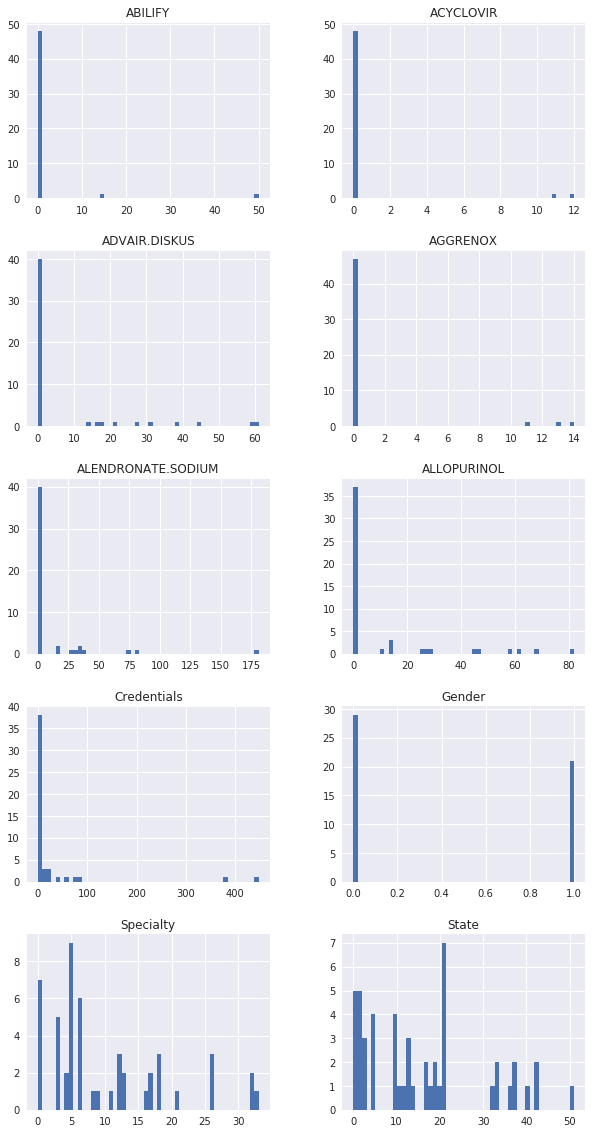

In [67]:
data[data.columns[:10]].hist(figsize=(10, 20), bins=50, layout=(5, 2)); 

In [68]:
#On commence par créer un tableau contenant les données les plus importantes, ici on fait abstraction du reste:

def extrait(tab,j):
    ligne,colonne=tab.shape
    temp = np.zeros(ligne)
    for i in range(ligne):
        temp[i]=tab[i][j]
    return temp 
    
    
    
x= np.zeros((5,data.shape[0]))
x[0]=extrait(data.values,0)
x[1]=extrait(data.values,1)
x[2]=extrait(data.values,2)
x[3]=extrait(data.values,3)
x[4]=extrait(data.values,243)
x=x.transpose()

#On convertit ensuite le tableau obtenu en DataFrame pandas :

colonne=["Genger","State","Credentials","Speciality","Target"]
newData=pd.DataFrame(data=x,index=np.arange(data.shape[0]),columns=colonne)
newData.head()

    
#Résultat obtenu :      

,Genger,State,Credentials,Speciality,Target
0,1.0,5.0,0.0,0.0,0.0
1,0.0,14.0,6.0,0.0,0.0
2,1.0,10.0,15.0,11.0,1.0
3,0.0,19.0,2.0,4.0,1.0
4,1.0,21.0,55.0,6.0,0.0


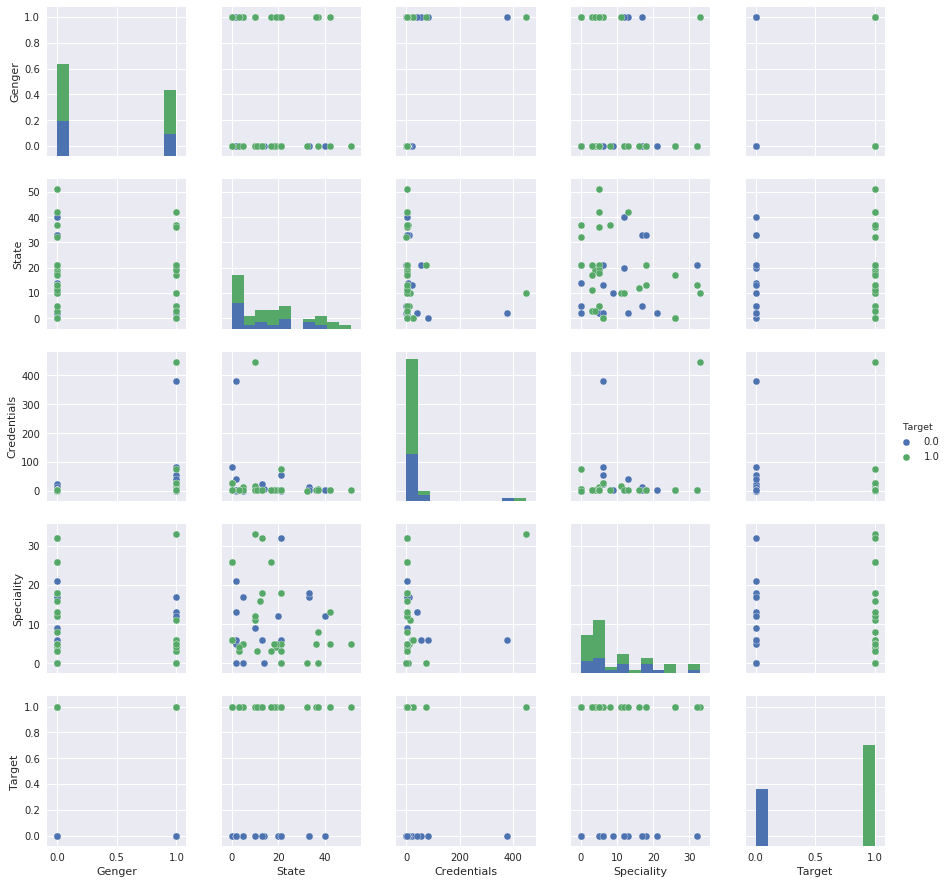

In [69]:
#Scatter plot : corrélation des données 
sns.pairplot(newData[0:50],hue="Target")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a5b3b4810>,
      dtype=object)

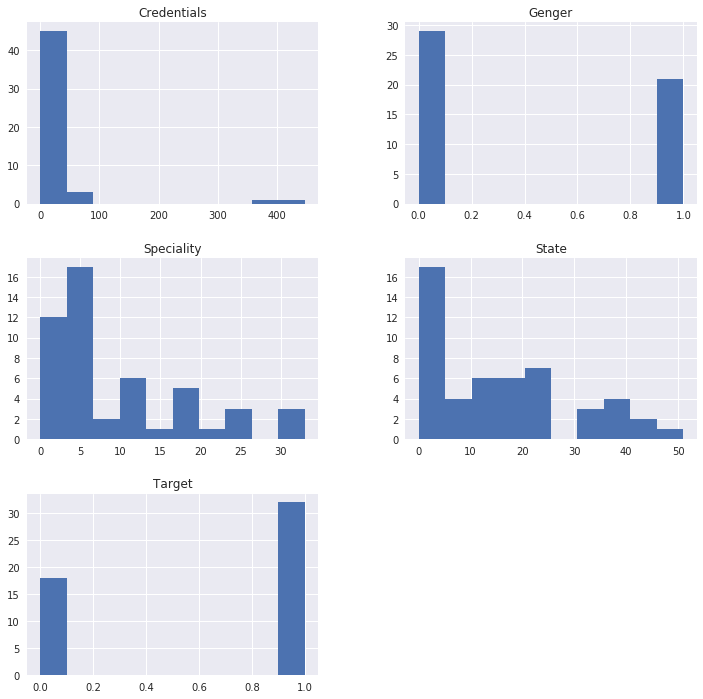

In [70]:
#Histogrammes  :

newData.hist(figsize=(12,12))


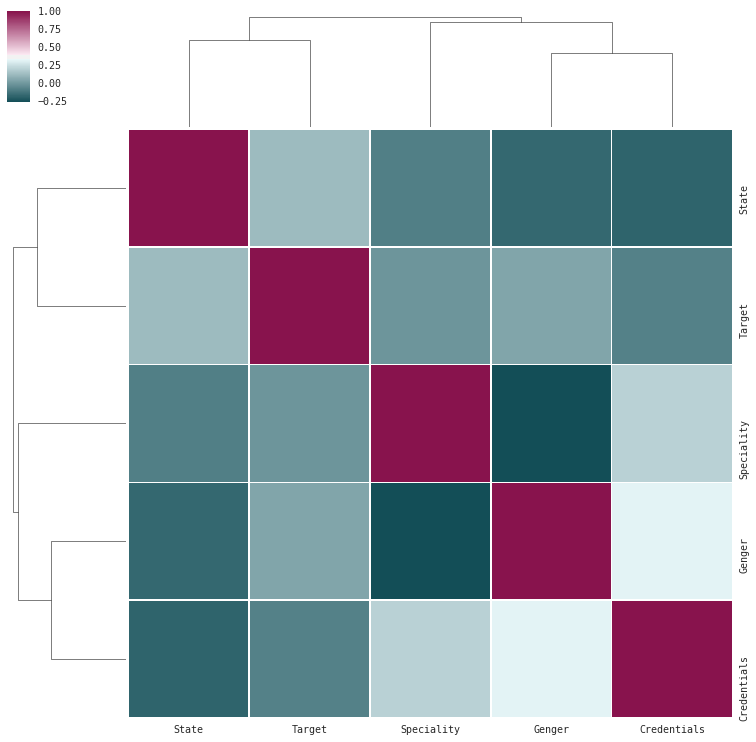

In [71]:
#Heatmap : 

#Ici, on fait bien attention à inverser l'axe des y 


#ax = sns.heatmap(data)
#ax.invert_yaxis()


#2eme méthode : 
sns.set(font="monospace")
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(newData.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)


# Avec matplotlib

#plt.matshow(newData,origin='lower')
#plt.title('exemple de matrice avec couleurs par defaut')



## Categorical Features' and Target's distributions 

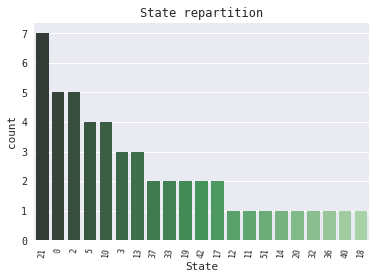

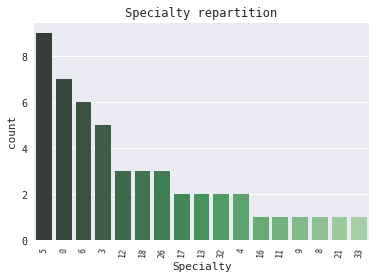

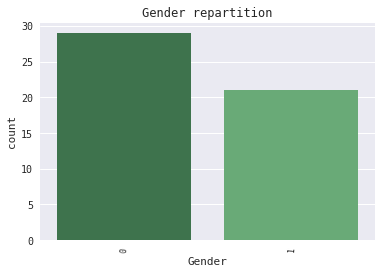

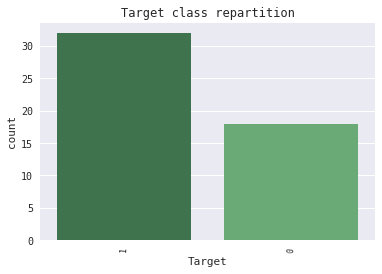

In [72]:
#import numpy as np
#cols = data.columns[:10]
#sns.pairplot(data[np.append(cols,"Opioid.Prescriber")], hue="Opioid.Prescriber")

import matplotlib.pyplot as plt
def plot_dist(data, feat, title):
    g = plt.figure()
    sns.countplot(x=feat, data= data, order = data[feat].value_counts().index,palette="Greens_d")
    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()
    
plot_dist(data, "State", "State repartition")
plot_dist(data, "Specialty", "Specialty repartition")
plot_dist(data, "Gender", "Gender repartition")
plot_dist(data, "Target", "Target class repartition")

# Step 2: Building a predictive model

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [73]:
from data_manager import DataManager  
D = DataManager(dataname, datadir, replace_missing=True)
print D

Info file found : /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/sample_data/Opioids_public.info
DataManager : Opioids
info:
	task = binary.classification
	name = Opioids
	feat_type = Numerical
	format = dense
	is_sparse = 0
	metric = auc_metric
	target_type = Numerical
	test_num = 20
	label_num = 2
	target_num = 2
	valid_num = 20
	has_categorical = 1
	usage = Sample dataset Opioids data
	feat_num = 243
	time_budget = 1200
	train_num = 20
	has_missing = 0
data:
	X_train = array(50, 243)
	Y_train = array(50,)
	X_valid = array(25, 243)
	X_test = array(25, 243)
feat_type:	array(243,)
feat_idx:	array(0,)



## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [74]:
from model import model
??model 

NameError: name 'D' is not defined

Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

In [ ]:
M = model()
trained_model_name = model_dir + dataname
M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

Train and run your predictive model. If you have saved a trained model in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. So delete iris_model.pickle from sample_code_submission if you do not want this to happen.

In [ ]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
X_test=D.data['X_test']
if not(M.is_trained):    
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

In [75]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained):    
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

NameError: name 'M' is not defined

Save the trained model (will be ready to reload next time around) and save the prediction results:

In [76]:
#CONFUSION MATRIX

#importation des metrics

from sklearn.metrics import confusion_matrix

Y_true = Y_train
X_test=(D.data['X_test'])
M.fit(X_train,Y_true)
Y_pred=M.predict(X_train)

matrix_conf=confusion_matrix(Y_true,Y_pred)
#matrix_conf= matrix_conf/ matrix_conf.astype(np.float).sum(axis=1)    Normalisation de la matrice


# FOnction de tracage de la matrice de confusion


def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

print_confusion_matrix(matrix_conf,["bon medecin","mauvais medecin"],(10,7),14)

NameError: name 'M' is not defined

No handlers could be found for logger "matplotlib.legend"


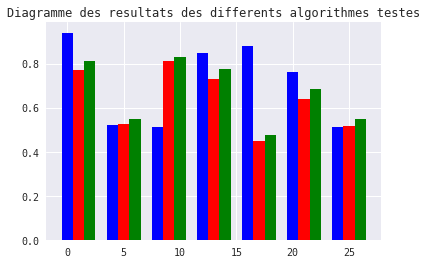

In [77]:
# Histogrammes des algorithmes en fonction des resultats


fig = plt.figure()

x = np.arange(27)
height =np.array([0.94,0.77,0.81024516,0,0.519,0.525,0.547353688,0,0.51,0.81,0.82874158,0,0.85,0.73,0.7760517,0,0.88,0.45,0.47623974,0,0.76,0.64,0.68656832,0,0.510,0.517,0.54722029])
width = 1.0

rouge=np.arange(1,27,4)
vert=np.arange(2,27,4)

graph=plt.bar(x, height, width, color='b')

for i in rouge:
    graph[i].set_facecolor('red')
for j in vert:
    graph[j].set_facecolor('green')
    


plt.savefig('Diagramme-des-algos.png')
plt.title("Diagramme des resultats des differents algorithmes testes")

# nb: one ne peut pas mettre les accents

plt.legend()
#plt.xlim(0)
plt.show()





In [78]:
# courbe roc

# pour cela on va chercher la proba q'un medecin soit classé dans 0 ou dans 1




from sklearn import tree
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
clf1.fit(X_train, Y_train)


y_prob = clf1.predict_proba(X_test)

Y_hat_train_prob =clf1.predict_proba(X_train) 
Y_hat_test_prob = y_prob


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print 'Train Accuracy: %s ' %acc_train
    print 'Train AUC: %s ' %auc_train
    print 'Train Confusion Matrix:'
    print cm_train

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Mauvais medecins incorrectement detectes")
    plt.ylabel("Bons medecins effectivement bien detectes")
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print 'Test Accuracy: %s ' %acc_test
    print 'Test AUC: %s ' %auc_test
    print 'Test Confusion Matrix:'
    print cm_test

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Mauvais medecins incorrectement detectes")
    plt.ylabel("Bons medecins effectivement bien detectes")
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold
Y_hat_test_prob1=np.zeros(25)
Y_hat_train_prob1=np.zeros(25)
Y_train1=np.zeros(25)


for i in range(25):
    Y_hat_test_prob1[i]=Y_hat_test_prob[i][1]
    Y_hat_train_prob1[i]=Y_hat_train_prob[i][1]
    Y_train1[i]=Y_train[i]
    Y_hat_test[i]=Y_train[i+25]
    

#Y_hat_train_prob=Y_hat_train_prob.reshape(100)
#Y_hat_test_prob=Y_hat_test_prob.reshape(50)
best_threshold=plot_ROC(Y_train1,Y_hat_train_prob1,Y_hat_test,Y_hat_test_prob1)



print(Y_hat_train_prob1.shape)
print(Y_hat_test_prob1.shape)
print(Y_train1.shape)
print(Y_hat_test)





y_train_true = np.array([0,0,1,1])
y_train_prob = np.array([0.1, 0.4, 0.35, 0.8])
y_test_true = np.array([0,1,0,1])
y_test_prob = np.array([0.2,0.3,0.4,0.6])
#best_threshold = plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob)

NameError: name 'Y_hat_test' is not defined

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_prob = clf1.predict_proba(X_test)

Y_hat_train_prob =clf1.predict_proba(X_train) 
Y_hat_test_prob = y_prob





def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print 'Train Accuracy: %s ' %acc_train
    print 'Train AUC: %s ' %auc_train
    print 'Train Confusion Matrix:'
    print cm_train

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print 'Test Accuracy: %s ' %acc_test
    print 'Test AUC: %s ' %auc_test
    print 'Test Confusion Matrix:'
    print cm_test

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold


In [80]:
# nouveau essai

y_pred=Y_hat_test

from sklearn.metrics import confusion_matrix

conf1 = confusion_matrix(y_test, y_pred)
conf1

from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(clf1,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)
clf2.fit(X_train, Y_train)

y_pred = clf2.predict(X_test)
y_prob = clf2.decision_function(X_test)
y_min = y_pred.min()
import numpy
y_score = numpy.array( [y_prob[i,p-y_min] for i,p in enumerate(y_pred)] )
y_score



NameError: name 'Y_hat_test' is not defined

In [81]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
#!ls $result_name*

NameError: name 'M' is not defined

## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.

In [82]:
import my_metric
import libscores

In [83]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
scoring_function = getattr(my_metric, 'auc_metric_')
print('Using scoring metric:', metric_name)
??scoring_function

('Using scoring metric:', 'auc_metric_')


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [84]:
Y_train.ndim

1

In [85]:
print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

Training score for the auc_metric_

NameError: name 'Y_hat_train' is not defined

### Other metrics
It is recommended to generally use `predict_proba` to get numeric predictions between 0 an 1. However, to compute the two metrics below, you need first to threshold them. </div>

In [86]:
y_hat_train = 1*(Y_hat_train>0.5)   # This turns the outputs to binary predictions 0/1
# Compute accuracy and confusion matrix:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print 'Training accuracy = %5.4f' % accuracy_score(Y_train, y_hat_train)
print 'Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(Y_train, y_hat_train)

NameError: name 'Y_hat_train' is not defined

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.

In [87]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

NameError: name 'model' is not defined

In [88]:
#Courbe ROC :
#La courbe ROC est l’outil de référence pour comparer les performances de deux classifiers en tenant compte du score
#de confiance qu’il retourne.

#On superpose deux courbes ROC obtenue pour deux classes différentes : un medecin de la classe 1 est bien classé si 
#le modèle prédit 1, il est mal classé sinon. 
#Tout d’abord une courbe ROC s’appuie sur le score que retourne le classifieur avec la méthode """""""".


#from sklearn import tree
#clf1 = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
#clf1.fit(X_train, Y_train)

#from sklearn.ensemble import AdaBoostClassifier
#clf2 = AdaBoostClassifier(clf1,
 #                        algorithm='SAMME',
  #                       n_estimators=800,
   #                      learning_rate=0.5)

#clf2.fit(X_train, Y_train)
#y_pred = clf2.predict(D.data['X_test'])
#y_prob = clf2.decision_function(D.data['X_test'])
#y_min = y_pred.min()

#import numpy
#y_score = numpy.array( [y_prob[i,p-y_min] for i,p in enumerate(y_pred)] )
#y_score[:5], y_pred[:5], y_prob[:5,:]

#from sklearn.metrics import roc_curve, auc

#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#nb_obs = dict()

#for i in clf2.classes_:
#    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score)
#    roc_auc[i] = auc(fpr[i], tpr[i])
#    nb_obs[i] = (y_test == i).sum()

#roc_auc, nb_obs

#fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)
#for cl in (3,4,5):
#    axes[0].plot(fpr[cl], tpr[cl], label='ROC classe %d (area = %0.2f)' % (cl, roc_auc[cl]))
#for cl in ("all",):
#    axes[1].plot(fpr[cl], tpr[cl], label='ROC classe (area = %0.2f)' % (roc_auc[cl]))
#axes[0].legend()
#axes[1].legend()


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [89]:
outdir = 'sample_result_submission'     

In [90]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/sample_data
Using output_dir: /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/sample_result_submission
Using program_dir: /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/ingestion_program
Using submission_dir: /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Opioids ********
************************************************
========= Reading and converting data ==========
Info file found : /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/sample_data/Opioids_public.info
========= Reading /home/zeneb/Documents/S4_L2MI/MiniProjet/Soumission/starting_kit_biomed/sample_data/Opioids_feat.type
[+] Success in  0.00 sec
========= Reading /home/zeneb/Documents/S4_L2MI

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

# NOTRE TRAVAIL


In [91]:

#La partie du binome visualtisation a été traitée ci-dessus : 
#Differents graphes ont été ajoutés au seins du notebook(Heatmap, courbe ROC,histogrammes et pairplot pour la correlations des données )  )

# Binome Preprocessing


In [92]:
X_train.shape

(50, 243)

In [93]:
Y_train.shape

(50,)

In [94]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

X = X_train
target = Y_train

L = LinearSVC(C = 0.01, penalty = "l1", dual = False).fit(X,target)
model = SelectFromModel(L, prefit=True)
X_new = model.transform(X)
X_new.shape

(50, 17)

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = X_train
target = Y_train

X.shape
clf = ExtraTreesClassifier()
clf = clf.fit(X,target)
clf.feature_importances_
model = SelectFromModel(clf, prefit = True)
X_nouveau = model.transform(X)
X_nouveau.shape


(50, 66)

In [96]:
#X_new[0:5]-X_nouveau[0:5,0:17]

#X_new[0:49,0]
#X_nouveau[0:5,0:17].shape
#data.values[0:49,2]

#X_new[0:49,7]

X_nouveau[0:49,]

array([[ 1.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0., 14.,  6., ...,  0.,  0.,  0.],
       [ 1., 10., 15., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2.,  2., ...,  0., 28.,  0.],
       [ 0., 13.,  2., ...,  0.,  0.,  0.],
       [ 1., 21., 74., ...,  0.,  0.,  0.]])

# Binome Modele predict


In [97]:
from model import model
??model 

NameError: name 'D' is not defined

# Scores de cross-validation

In [98]:
n = 10
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

TypeError: 'SelectFromModel' object is not callable

# scores deTraining

In [99]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained):    
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])
print "score de Training:" ,scoring_function(Y_train,Y_hat_train)

NameError: name 'M' is not defined

# Sparsity

In [100]:
print X_train.size ,Y_train.size
print Xva.size, Yva.size
print Xtr.size, Ytr.size
print Y_hat_test.size, Y_hat_valid.size

12150 50
1215 5
10935 45


NameError: name 'Y_hat_test' is not defined

In [101]:
print"saparsity_training:",float(np.count_nonzero(X_train))/(X_train.size)

saparsity_training: 0.116049382716


In [102]:
X_valid=D.data['X_valid']
print"saparsity_validation:",float(np.count_nonzero(X_valid))/(X_valid.size)

saparsity_validation: 0.0941563786008


In [103]:
X_test=D.data['X_test']
print"saparsity_test:",float(np.count_nonzero(X_test))/(X_test.size)

saparsity_test: 0.0551440329218


In [104]:
target = Y_train
X_test=(D.data['X_test'])
clf.fit(X_train,target)
predicted_train = clf.predict(X_train)
print " predicted_train:",predicted_train
pred_pro = clf.predict_proba(X_test)
print "pred_pro:",pred_pro
clf.classes_

 predicted_train: [0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1.]
pred_pro: [[0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [0.6 0.4]
 [0.7 0.3]
 [0.5 0.5]
 [0.1 0.9]
 [0.8 0.2]
 [0.2 0.8]
 [0.5 0.5]
 [0.6 0.4]
 [0.8 0.2]
 [0.7 0.3]
 [1.  0. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.5 0.5]
 [0.7 0.3]
 [1.  0. ]
 [0.2 0.8]
 [0.5 0.5]
 [0.4 0.6]
 [0.4 0.6]]


array([0., 1.])

#  BestParam

In [105]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [106]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



# Build a classification
GBM = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                     n_estimators=100, subsample=1.0, criterion='friedman_mse',
                                     min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0
                                     , max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None
                                     , warm_start=False, presort='auto') 

param_grid = { 
    'n_estimators': [100, 500,10,50,200],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)
CV_GBM.fit(X_train, Y_train)
print CV_GBM.best_params_


/home/zeneb/ENTER/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/zeneb/ENTER/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_features': 'sqrt', 'n_estimators': 100}


In [107]:
!pip install xgboost

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [108]:
import xgboost as xgb

In [109]:
clf = xgb.XGBClassifier()
clf.fit(X_train, Y_train)
testPredictions = clf.predict(X_train)

/home/zeneb/ENTER/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn import tree
X = [X_train,Xtr,Xva]
Y = [Y_train,Ytr,Yva]
steps =["+Training:", "+Cross-validation:", "+Validation:"]
clf_dict = {"===>RandomForestClassifier":RandomForestClassifier(n_estimators=100, max_features=100),
            "=== > GradientBoostingClassifier":GradientBoostingClassifier(),
            #"XGBClassifier":xgb.XGBClassifier()
            #"DecisionTreeClassifier":tree.DecisionTreeClassifier(),
            #"Perceptron":Perceptron(),
            #"SVC":SVC()
           }
for x, y, step in zip(X, Y,steps):
    print step
    for clf_name,clf in clf_dict.items():
        clf = clf.fit(x, y)
        scores = cross_val_score(clf, x, y)
        print clf_name + ":", scores.mean()


+Training:
===>RandomForestClassifier: 0.738970588235294
=== > GradientBoostingClassifier: 0.6372549019607844
+Cross-validation:
===>RandomForestClassifier: 0.7111111111111111
=== > GradientBoostingClassifier: 0.6444444444444444
+Validation:


/home/zeneb/ENTER/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


===>RandomForestClassifier: 0.6666666666666666
=== > GradientBoostingClassifier: 0.3333333333333333


In [111]:
def test_importance(clf, X):
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [112]:
print(test_importance(clf_dict,X_train))

AttributeError: 'dict' object has no attribute 'feature_importances_'

In [ ]:
#Courbe ROC :
#La courbe ROC est l’outil de référence pour comparer les performances de deux classifiers en tenant compte du score
#de confiance qu’il retourne.

#On superpose deux courbes ROC obtenue pour deux classes différentes : un medecin de la classe 1 est bien classé si 
#le modèle prédit 1, il est mal classé sinon. 
#Tout d’abord une courbe ROC s’appuie sur le score que retourne le classifieur avec la méthode """""""".


from sklearn import tree
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
clf1.fit(X_train, Y_train)

from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(clf1,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)

clf2.fit(X_train, Y_train)
y_pred = clf2.predict(x_test)
y_prob = clf2.decision_function(x_test)
y_min = y_pred.min()
import numpy
y_score = numpy.array( [y_prob[i,p-y_min] for i,p in enumerate(y_pred)] )
y_score[:5], y_pred[:5], y_prob[:5,:]

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
nb_obs = dict()

for i in clf2.classes_:
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    nb_obs[i] = (y_test == i).sum()

roc_auc, nb_obs

fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)
for cl in (3,4,5):
    axes[0].plot(fpr[cl], tpr[cl], label='ROC classe %d (area = %0.2f)' % (cl, roc_auc[cl]))
for cl in ("all",):
    axes[1].plot(fpr[cl], tpr[cl], label='ROC classe (area = %0.2f)' % (roc_auc[cl]))
axes[0].legend()
axes[1].legend()

In [ ]:
class model(BaseEstimator): 

    def __init__(self): 

        pass 

    def fit(self, X, y): 

        self.clf =  Pipeline([ ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))), 
                               ('classification', RandomForestClassifier()) ])
        self.clf.fit(X, y) 

    def predict(self, X): 

        return self.clf.predict(X) 

    def predict_proba(self, X): 

        return self.clf.predict_proba(X) # The classes are in the order of the labels returned by get_classes 

    def get_classes(self): 

        return self.clf.classes_ 

    def save(self, path="./"): 

        pickle.dump(self, open(path + '_model.pickle', "w")) 

    def load(self, path="./"): 

        self = pickle.load(open(path + '_model.pickle')) 

        return self 
    